#### [지도학습 - 회귀]
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예: 거리, 시간, 무게, 집가격 등등 ...

- 주제 : 생선 길이에 따른 무게를 예측하는 모델
- 방법 : 최근접이웃 알고리즘

[1] 모듈 로딩 및 데이터 준비 <hr>

In [697]:
# ========================================================
# [1-1] 모듈 로딩
# ========================================================
# 기본 모듈
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 머신러닝 데이터셋 및 학습관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# CoW 활성화 : 복사와 공유 자동 설정 기능
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [698]:
# ========================================================
# [1-2] 데이터 준비 및 확인
# ========================================================

# 데이터 준비
FILE_NAME = '../Data/fish_train_10500.csv'

# Bream, Smelt 생선 데이터만 추출
fishDF = pd.read_csv(FILE_NAME, usecols=[0, 1, 5])

(fishDF.Species == 'Bream') | (fishDF.Species == 'Smelt')

dataDF = fishDF[fishDF.Species.isin(['Bream', 'Smelt'])]

dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 10499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   3000 non-null   float64
 1   Length   3000 non-null   float64
 2   Species  3000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 93.8+ KB


        Weight  Length
Weight 1.00000 0.96938
Length 0.96938 1.00000


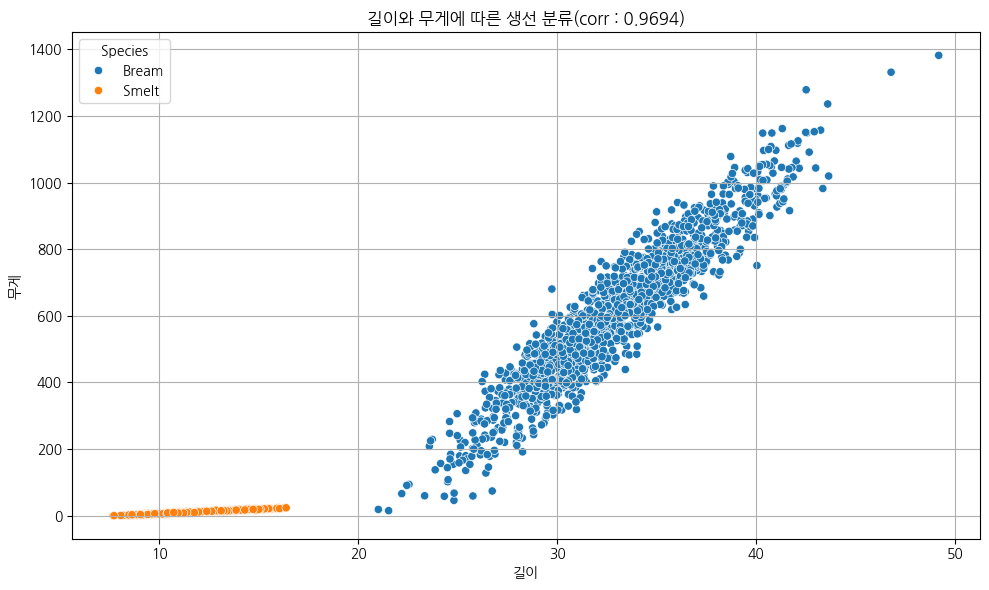

In [699]:
# ========================================================
# [1-3] 길이와 무게, 품종 관계 시각화
# ========================================================
corr_ = dataDF.corr(numeric_only=True)
print(dataDF.corr(numeric_only=True))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataDF, x='Length', y='Weight', hue='Species')
plt.title(f"길이와 무게에 따른 생선 분류(corr : {corr_['Weight']['Length']:.4f})")
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid(True)
plt.tight_layout()

[2] 피쳐와 타겟/학습용과 테스트용 분리 <hr>

In [700]:
# ========================================================
# [2-1] 피쳐와 타겟 분리
# ========================================================
featureDF = dataDF[dataDF.columns[1:-1]]
targetSR = dataDF[dataDF.columns[0]]
print(featureDF)
print(f"featureDF : {featureDF.shape}, targetSR : {targetSR.shape}")

        Length
0     32.42375
1     41.36527
2     33.44470
3     35.68641
4     33.52775
...        ...
10495 11.21824
10496 13.10661
10497 12.38393
10498 10.94337
10499 10.72247

[3000 rows x 1 columns]
featureDF : (3000, 1), targetSR : (3000,)


In [701]:
# ========================================================
# [2-2] 학습용과 테스트용 분리 : 회귀 시에는 stratify 필요 없음
#                             분류 시에는 클래스/라벨별 비율 설정을 위해서 stratify 필요!
# ========================================================
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                             targetSR,
                                                             test_size=0.2,
                                                             random_state=7)

print(f"[train] x_train : {x_train.shape}, y_train : {y_train.shape}")
print(f"[train] x_test : {x_train.shape}, y_test : {y_train.shape}")


[train] x_train : (2400, 1), y_train : (2400,)
[train] x_test : (2400, 1), y_test : (2400,)


In [702]:
# ========================================================
# 학습 진행
# ========================================================
# 모델 인스턴스 생성
kModel = KNeighborsRegressor()
kModel

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [703]:
# 학습 진행 => 학습용 데이터셋만 사용
kModel.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [704]:
# 학습 후 학습용 데이터셋 기반 모델 파라미터 설정
# - 모델 파라미터 : 파라미터이름_
print('n_features_in_ : ', kModel.n_features_in_)
print('feature_names_in_ : ', kModel.feature_names_in_)
print('n_samples_fit_ : ', kModel.n_samples_fit_)

n_features_in_ :  1
feature_names_in_ :  ['Length']
n_samples_fit_ :  2400


[4] 성능평가 <hr>

In [705]:
# 훈련용 성능평가 & 테스트용 성능평가 비교
train_score = kModel.score(x_train, y_train)
test_score = kModel.score(x_test, y_test)\

print(f"[trian_score] {train_score}")
print(f"[test_score]  {test_score}")

[trian_score] 0.9831830752898428
[test_score]  0.9782740092835336


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운 피쳐) => 예측 무게 값
- n_neighbors의 무게를 추출 => 평균한 값과 예측 무게값이 같은지 체크

,Length
0,20
1,3
2,45


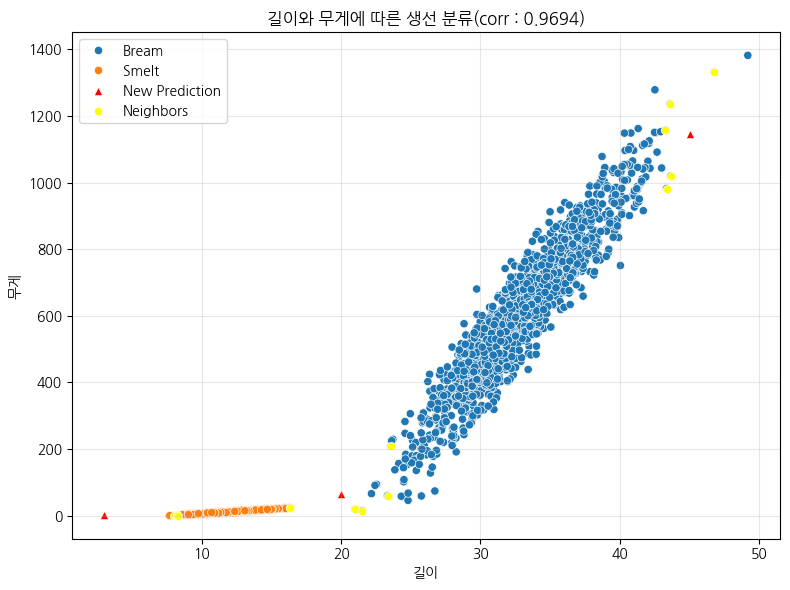

In [ ]:
# =============================================================================
# 새로운 데이터
# =============================================================================

newDF = pd.DataFrame([[20], [3], [45]], columns=dataDF.columns[1:-1])
display(newDF)

# =============================================================================
# n_neighbors 찾기 및 예측
# =============================================================================

dls_, indices = kModel.kneighbors(newDF)
pre_weights = kModel.predict(newDF)

# =============================================================================
# 시각화
# =============================================================================

plt.figure(figsize=(8, 6))

# 기존 데이터셋
sns.scatterplot(data=dataDF, x='Length', y='Weight', hue='Species')

# newDF의 각 행마다 시각화
for row in range(len(newDF)):

    # 새로운 데이터
    predDF = pd.DataFrame({
        'Length': [newDF.iloc[row, 0]],
        'Weight': [pre_weights[row]]
    })
    
    sns.scatterplot(data=predDF, x='Length', y='Weight', color='red', 
                    marker='^', label='New Prediction' if row == 0 else '')
    
    # 최근접 이웃 데이터
    indices_ = indices[row].tolist()
    
    for idx, i in enumerate(indices_):
        if row == 0 and idx == 0:
            sns.scatterplot(x=x_train.iloc[i], y=y_train.iloc[i], 
                           color='yellow', label='Neighbors')
        else:
            sns.scatterplot(x=x_train.iloc[i], y=y_train.iloc[i], 
                           color='yellow')

plt.title(f"길이와 무게에 따른 생선 분류(corr : {corr_['Weight']['Length']:.4f})")

plt.xlabel('길이'); plt.ylabel('무게'); plt.legend()
plt.grid(True, alpha=0.3); plt.tight_layout()
plt.show()
# =============================================================================\

[0] pre_weights :   65.28573        calc :   65.28573
[1] pre_weights :    0.69563        calc :    0.69563
[2] pre_weights : 1145.49170        calc : 1145.49170


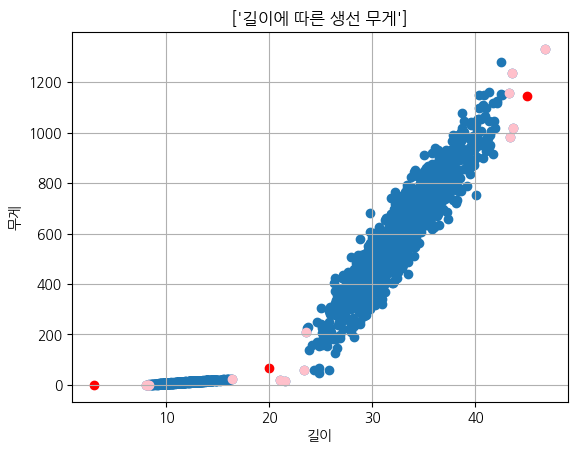

In [707]:
## ==========================
## n_neighbors 시각화
## ==========================
plt.scatter(x_train, y_train)


for idx in range(newDF.shape[0]):

    # 최근접 이웃 인덱스 5개
    n_idx = indices[idx].tolist()

    plt.scatter(newDF.iloc[idx],     pre_weights[idx], c='red')
    plt.scatter(x_train.iloc[n_idx], y_train.iloc[n_idx], c='pink')
    
    print(f'[{idx}] pre_weights : {pre_weights[idx]:10.5f}', end='')
    print(f'        calc : {y_train.iloc[n_idx].sum()/5:10.5f}')

plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.title([f"길이에 따른 생선 무게"])
plt.show()